In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from custom_func import run_cba

# setting the style
plt.style.use('seaborn-whitegrid')

# setting the annotation default font 
plt.rcParams["font.family"] = "roboto"
plt.rcParams["font.size"] = 10

plt.rcParams["figure.autolayout"] = False


plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False

This workbook aims to conduct the sensitivity of the cost-benefit ratio of a congestion charge in New York City based on varying price elasticity to road use, discount rate, and congestion charge.

#### 1. Parameters
The following parameters are determined through literture reviews.

$\quad \epsilon_{t,p} \times \frac{Congestion\, Charge}{Cost\, of\, Driving} $

$= 0.5 \times \frac{14}{17.8\times 1.55} $

$= 0.2537$



$\quad \epsilon_{ts,tvol} \times \Delta \%traffic \times time\, cost $

$= 0.1471 \times 0.2537 \times 817\textrm{million} $

$= 304 \textrm{million per year} $


$time\,cost =1434000\times 260 \times \frac{40}{60} \times 32.86=\textrm{8 billion}$



$\quad \frac{1}{3} \times 304 \textrm{million per year} $

$= 102 \textrm{million per year} $

##### CO_2

$\quad Emission\,per\,mile^{[1]} \times Reduction\, in\,Milelage\times Cost^{[2]}$

$ = 0.411 \times \textrm{102 million}\times 0.033 $

$= \textrm{23 million per year}$


##### NO_x
$\quad Emission\,per\,mile^{[3]} \times Reduction\, in\,Milelage\times Cost^{}[2] $

$=0.00007 \times   \textrm{102 million}\times 0.081 $

$= \textrm{0.01 million per year} $


$ Reduction\, in\, Mileage = 0.2537\times1434000\times17.8\times 260=\textrm{168 million}$ 

##### Accidents
$\quad\epsilon_{ta,tvol} \times \Delta \%traffic \times cost $

$= 0.1513 \times 0.2537 \times \textrm{4290 million}$

$= \textrm{164 million per year}$

##### Operational cost

$\quad \textrm{38.9 million}^{[1]} \times 1.24^{[2]} \times 3.998^{[3]}$

$=\textrm{193 million per year}$


##### Investment Cost
$\quad  \textrm{200 million}^{[1]} \times1.32^{[2]}\times 1.619^{[3]}$

$=\textrm{427 million}$

$\quad \frac{263,635}{753,406}\times 100\%$

$=35.125\%$

$\quad \textrm{48.9 million}^{[1]}\times \frac{50\%}{35.125\%}$

$=\textrm{95 million}$

#### 2. Cost-benefit analysis
Impute a list of discount rate, congestion charge, and elasticity for conducting a cost-benefit analysis

In [2]:
dis_rate    = [x for x in np.arange(0.02,0.08,0.002)]
charges     = [x for x in np.arange(9,23,0.5)]
elases      = [x for x in np.arange(0.25,0.51,0.01)]

col =[  'Discount Rate', 'Charge','Elasticity','B_timesaving','B_reliability','B_pollution','B_accident',
        'C_operational', 'C_investment','C_subsidy','Benefit-Cost Ratio']
df = pd.DataFrame(columns = col)
for dis in dis_rate:
    #for charge in charges:
    for elas in elases:
            data = run_cba(dis_rate = dis, charge = 14, elas = elas)
            df = df.append(data, ignore_index = True)

df.head()

,Discount Rate,Charge,Elasticity,B_timesaving,B_reliability,B_pollution,B_accident,C_operational,C_investment,C_subsidy,Benefit-Cost Ratio,Benefit-Cost Ratio - Dummy
0,0.02,14,0.25,152.415037,50.805012,11.423420,82.340323,192.847528,427.416,95,1.002551,1.0
1,0.02,14,0.26,158.511639,52.837213,11.880356,85.633935,192.847528,427.416,95,1.042653,1.0
2,0.02,14,0.27,164.608240,54.869413,12.337293,88.927548,192.847528,427.416,95,1.082755,1.0
3,0.02,14,0.28,170.704841,56.901614,12.794230,92.221161,192.847528,427.416,95,1.122857,1.0
4,0.02,14,0.29,176.801443,58.933814,13.251167,95.514774,192.847528,427.416,95,1.162959,1.0


#### 3. Sensitivity Analysis – Visualization

##### 3.1 Elasticity/Discount Rate

(0.2, 0.5)

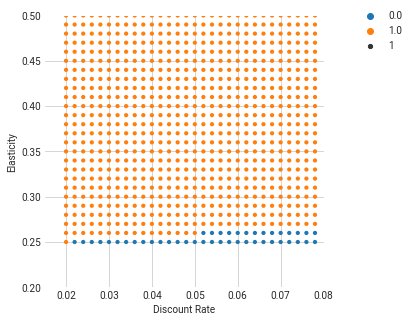

In [21]:
fig, ax = plt.subplots(figsize = (5,5))
fig.patch.set_alpha(0)

p1 = sns.scatterplot(x = "Discount Rate",y='Elasticity',hue = 'Benefit-Cost Ratio - Dummy', data = df, linewidth = 0, ax = ax, size = 1)
ax.legend(bbox_to_anchor=(1.1, 1.05))

ax.set_xlim(0.015,0.08)
ax.set_ylim(0.20,0.5)

##### 3.2 Discount Rate

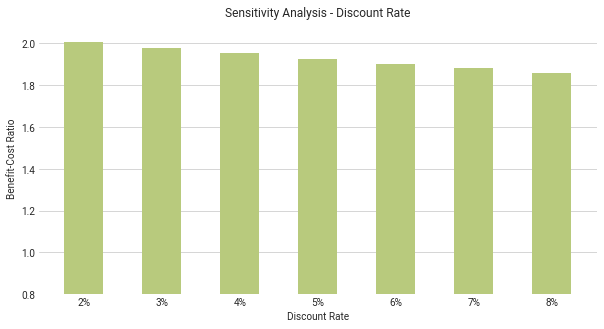

In [7]:
df_dr = pd.DataFrame(columns = col)
n = 0 
for x in np.arange(0.02,0.09,0.01):
    data = run_cba(dis_rate = x)
    df_dr = df_dr.append(data, ignore_index = True)

fig, ax = plt.subplots(figsize = (10,5))
fig.patch.set_alpha(0)

x = ['2%','3%','4%','5%','6%','7%','8%']
ax.bar(x,df_dr['Benefit-Cost Ratio'],width = 0.5, color = "#b8ca7d")


#ax.set_xlim(0.015,0.08)
ax.set_ylim(0.8,2.1)
ax.set_title("Sensitivity Analysis - Discount Rate")
ax.set_ylabel("Benefit-Cost Ratio")
ax.set_xlabel("Discount Rate")
ax.xaxis.grid(False)

plt.savefig('sensitivity_analysi-dr.png', dpi = 300 , transparent = True)



##### 3.3 Price Elasticity

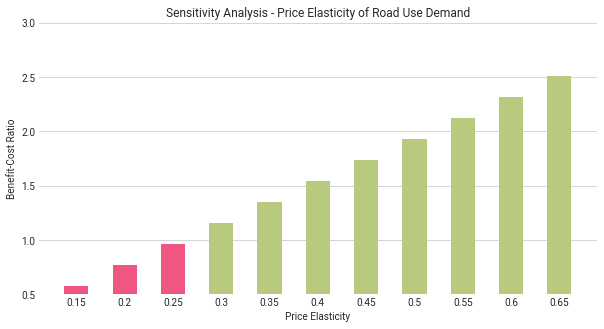

In [9]:
df_el = pd.DataFrame(columns = col)
plt.rcParams["font.size"] = 10
for x in np.arange(0.15,0.7,0.05):
    data = run_cba(elas = x)
    df_el = df_el.append(data, ignore_index = True)

fig, ax = plt.subplots(figsize = (10,5))
fig.patch.set_alpha(0)

x = ['0.15','0.2','0.25','0.3','0.35','0.4','0.45','0.5','0.55','0.6','0.65']
c = ['#f05682','#f05682','#f05682',"#b8ca7d","#b8ca7d","#b8ca7d","#b8ca7d","#b8ca7d","#b8ca7d","#b8ca7d","#b8ca7d"]
ax.bar(x,df_el['Benefit-Cost Ratio'],width = 0.5, color = c)


#ax.set_xlim(0.015,0.08)
ax.set_ylim(0.5,3)
ax.set_title("Sensitivity Analysis - Price Elasticity of Road Use Demand")
ax.set_ylabel("Benefit-Cost Ratio")
ax.set_xlabel("Price Elasticity")
ax.xaxis.grid(False)

plt.savefig('sensitivity_analysi-el.png',dpi = 400 , transparent = True)